In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_lg')

In [6]:
with open(r'data\fitzgerald\fitzgerald_gatsby.txt', 'r') as f:
    fg_text = f.read()

gatsby_nlp = nlp(fg_text)

with open(r'data\hemingway\hemingway_sun_also.txt', 'r') as f:
    sun_text = f.read()

sun_nlp = nlp(sun_text)

In [8]:
tagDict = {w.pos: w.pos_ for w in gatsby_nlp}

In [9]:
gatsby_POS = pd.Series(gatsby_nlp.count_by(spacy.attrs.POS))/len(gatsby_nlp)
sun_POS = pd.Series(sun_nlp.count_by(spacy.attrs.POS))/len(sun_nlp)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

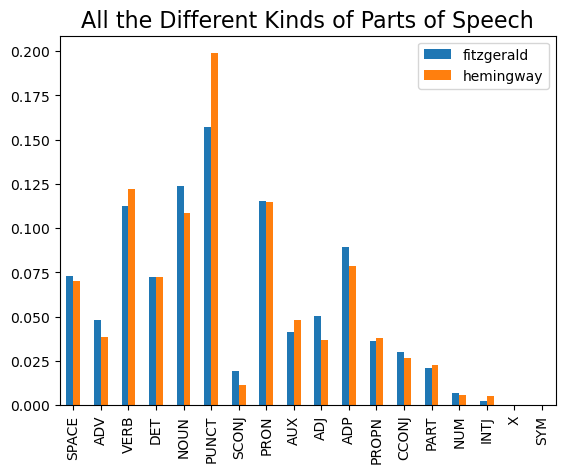

In [10]:
df = pd.DataFrame([gatsby_POS, sun_POS], index=['fitzgerald', 'hemingway'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')
plt.title('All the Different Kinds of Parts of Speech', fontsize=16)

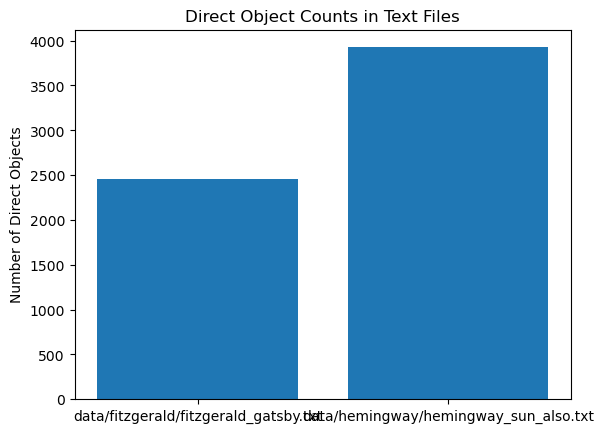

In [14]:
file_names = [
    'data/fitzgerald/fitzgerald_gatsby.txt',
    'data/hemingway/hemingway_sun_also.txt'
]

# List to store the number of direct objects for each text file
direct_object_counts = []

# Loop over the file names
for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)

# Plot the results using a bar plot
x = range(len(file_names))
plt.bar(x, direct_object_counts)
plt.xticks(x, file_names)
plt.ylabel("Number of Direct Objects")
plt.title("Direct Object Counts in Text Files")
plt.show()


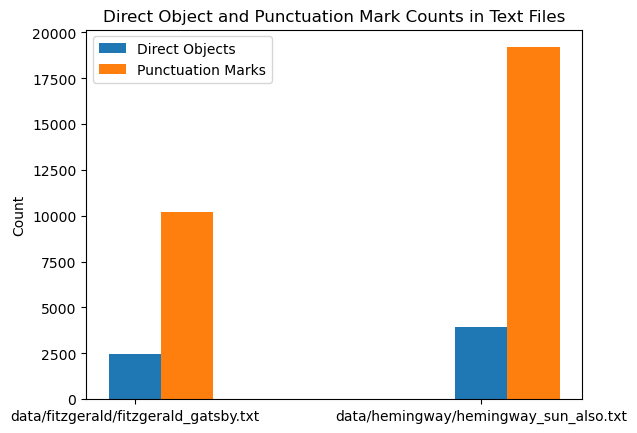

In [18]:
direct_object_counts = []
punct_counts = []

for file_name in file_names:
    # Open the text file and read its content
    with open(file_name, "r") as file:
        text = file.read()

    # Process the text using spaCy
    doc = nlp(text)

    # Initialize a counter for direct objects
    direct_object_count = 0
    punct_count = 0

    # Iterate over the parsed sentences in the text
    for sent in doc.sents:
        # Iterate over the tokens in the sentence
        for token in sent:
            # Check if the token is a direct object
            if token.dep_ == "dobj":
                # Increment the counter
                direct_object_count += 1
            elif token.pos_ == "PUNCT":
                punct_count += 1

    # Append the number of direct objects found to the list
    direct_object_counts.append(direct_object_count)
    punct_counts.append(punct_count)

x = range(len(file_names))
bar_width = 0.15
plt.bar(x, direct_object_counts, bar_width, label="Direct Objects")
plt.bar([i + bar_width for i in x], punct_counts, bar_width, label="Punctuation Marks")
plt.xticks(x, file_names)
plt.ylabel("Count")
plt.title("Direct Object and Punctuation Mark Counts in Text Files")
plt.legend()
plt.show()